In [1]:
import cantera as ct
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler


In [30]:
%config InlineBackend.figure_formats = ['svg']

In [69]:
# plt.style.use('ggplot')

file = 'mechanisms/marinov_ethanol/ethanol-marinov.yaml'
# models = {'Original': 'baseline', 'LMR-R': 'linear-Burke'}
# colours = ["xkcd:grey",'xkcd:purple']
Tin = 293  # unburned gas temperature [K]
p=760  # pressure [torr]
n=10 # number of points to simulate
phi_list = np.linspace(0.5,1.5,n) # equivalence ratios to simulate across
# for k, m in enumerate(models):
vel_list = []
P_e = []
gas = ct.Solution(file)
for j, phi in enumerate(phi_list):
    print("NNNNNNNNNNNNNNNNNNN  ", j)
    gas.set_equivalence_ratio(phi, 'c2h5oh', {'o2':1, 'n2': 3.76})
    gas.TP = Tin, (p/760)*ct.one_atm
    print(gas())
    P_e.append(gas.concentrations[gas.species_index("c2h5oh")]*1000*8.31*gas.T/1e5)
    f = ct.FreeFlame(gas, grid=np.linspace(0, 0.05, 30))
    f.set_refine_criteria(ratio=3, slope=0.06, curve=0.10)
    # f.transport_model = 'multicomponent' # optionally enable
    # f.soret_enabled = True  # optionally enable
    f.solve(loglevel=1, auto=True)
    vel_list.append(f.velocity[0] * 100) # cm/s



NNNNNNNNNNNNNNNNNNN   0

  ethanol_mech:

       temperature   293 K
          pressure   1.0132e+05 Pa
           density   1.2242 kg/m^3
  mean mol. weight   29.433 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -2.7531e+05       -8.1034e+06  J
   internal energy       -3.5808e+05        -1.054e+07  J
           entropy            6866.4         2.021e+05  J/K
    Gibbs function       -2.2872e+06        -6.732e+07  J
 heat capacity c_p            1029.5             30302  J/K
 heat capacity c_v            747.03             21988  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                o2           0.22066           0.20298           -26.257
            c2h5oh           0.05295          0.033829           -133.58
                n2           0.72639      

/tmp/ipykernel_194695/4034545094.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, loc='upper right')


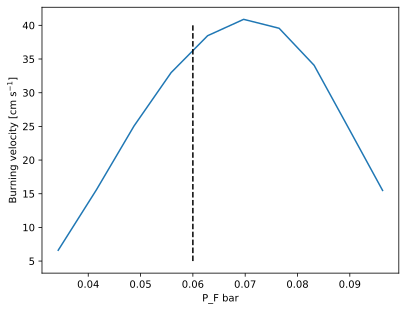

In [73]:

fig, ax = plt.subplots()
ax.plot(P_e, vel_list)
# ax.set_xticklabels([f"{phi:.1f} {p/(10**5):.3f}" for p, phi in zip(P_e, phi_list)])
# expData = {
#    'X_NH3': [16.3,16.4,17.0,18.0,19.0,20.0,21.9,24.0,26.0,28.5,29.0,30.0,31.0,31.5],
#    'vel': [1.35,1.48,2.30,3.36,4.01,5.88,6.80,8.14,6.73,5.00,4.78,3.3,2.9,3.0]
# }
# X_NH3 = np.divide(expData['X_NH3'],100)
# X_O2 = np.multiply(np.subtract(1,X_NH3), 0.21)
# phi_data = np.divide(np.divide(X_NH3,X_O2),np.divide(4,3))
# ax.plot(phi_data, expData['vel'], 'o', fillstyle='none', color='k', label='Ronney')
ax.legend(frameon=False, loc='upper right')
ax.set_ylabel(r'Burning velocity [cm $\rm s^{-1}$]')
ax.set_xlabel(r'P_F bar')
ax.plot([0.06, 0.06], [5, 40], '--', color='k')

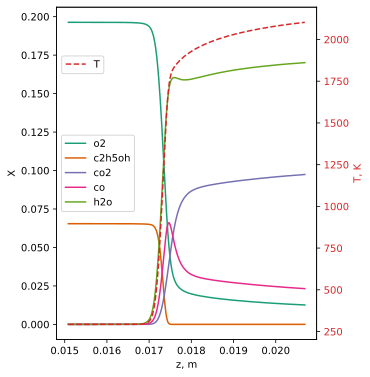

In [62]:
plt.style.use('default')

mask = (f.grid > 0.015) & (f.grid < 0.021)

# fig, ax = plt.subplots()
fig, ax2 = plt.subplots(figsize=(7/1.5, 9/1.5))

# fig.set_dpi(1000)

color = 'tab:red'
ax2.set_xlabel('z, m')
spns = ["o2", "c2h5oh",  "co2", "co", "h2o"]
ax1 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

ax1.set_ylabel('T, K', color=color)
ax1.plot(f.grid[mask], f.T[mask], color=color, linestyle='dashed', label="T")
# ax1.plot(t_D, tvec6[:, 0], color="tab:orange")
ax1.tick_params(axis='y', labelcolor=color)
ax2.set_prop_cycle('color',plt.cm.Dark2(list(range(len(spns)))))
color = 'black'
ax2.set_ylabel('X', color=color) 
# ax2.set_color_cycle(sns.color_palette("coolwarm_r",num_lines))
# spis = [gas.species_index(i) for i in spns]
for i in spns:
    ax2.plot(f.grid[mask], f.X[gas.species_index(i)][mask], label=i)
ax2.legend()
ax1.legend(loc=(0.02, 0.8))
ax2.tick_params(axis='y', labelcolor=color)




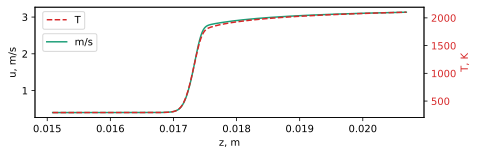

In [66]:
plt.style.use('default')

mask = (f.grid > 0.015) & (f.grid < 0.021)

# fig, ax = plt.subplots()
fig, ax2 = plt.subplots(figsize=(7, 2))

# fig.set_dpi(1000)

color = 'tab:red'
ax2.set_xlabel('z, m')
spns = ["o2", "c2h5oh",  "co2", "co", "h2o"]
ax1 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

ax1.set_ylabel('T, K', color=color)
ax1.plot(f.grid[mask], f.T[mask], color=color, linestyle='dashed', label="T")
# ax1.plot(t_D, tvec6[:, 0], color="tab:orange")
ax1.tick_params(axis='y', labelcolor=color)
ax2.set_prop_cycle('color',plt.cm.Dark2(list(range(len(spns)))))
color = 'black'
ax2.set_ylabel('u, m/s', color=color) 

ax2.plot(f.grid[mask], f.velocity[mask], label="m/s")
ax2.legend(loc=(0.02, 0.6))
ax1.legend(loc=(0.02, 0.8))
ax2.tick_params(axis='y', labelcolor=color)


In [47]:
f.grid

array([0.        , 0.00172414, 0.00344828, 0.00517241, 0.00689655,
       0.00862069, 0.01034483, 0.01206897, 0.01293103, 0.0137931 ,
       0.01465517, 0.01508621, 0.01551724, 0.01594828, 0.01616379,
       0.01637931, 0.01648707, 0.01659483, 0.01670259, 0.01675647,
       0.01681034, 0.01686422, 0.0169181 , 0.01697198, 0.01699892,
       0.01702586, 0.0170528 , 0.01706627, 0.01707974, 0.01709321,
       0.01710668, 0.01712015, 0.01713362, 0.01714036, 0.01714709,
       0.01715383, 0.01716056, 0.0171673 , 0.01717403, 0.0171774 ,
       0.01718077, 0.01718413, 0.0171875 , 0.01719087, 0.01719423,
       0.0171976 , 0.01720097, 0.01720434, 0.0172077 , 0.01721107,
       0.01721444, 0.01721781, 0.01722117, 0.01722454, 0.01722791,
       0.01723128, 0.01723464, 0.01723633, 0.01723801, 0.0172397 ,
       0.01724138, 0.01724306, 0.01724475, 0.01724643, 0.01724811,
       0.01724896, 0.0172498 , 0.01725064, 0.01725148, 0.01725232,
       0.01725317, 0.01725401, 0.01725485, 0.01725569, 0.01725